https://www.kaggle.com/varpit94/ethereum-data

In [121]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/datasets/ejemplos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname(os.path.abspath("Matplotlib")) + "/"

In [122]:
import pandas as pd


df = pd.read_csv(data_dir+"ETH-USD.csv",usecols=["Date","Open","Volume"],parse_dates=["Date"],index_col=["Date"])

In [123]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1598 entries, 2017-11-09 to 2022-03-25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1598 non-null   float64
 1   Volume  1598 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 37.5 KB


,Open,Volume
count,1598.000000,1.598000e+03
mean,1026.060794,1.245347e+10
std,1230.979724,1.121937e+10
min,84.279694,6.217330e+08
25%,196.428421,3.154440e+09
50%,386.373398,9.525409e+09
75%,1647.892822,1.764118e+10
max,4810.071289,8.448291e+10


In [124]:
#df.set_index(df["Date"])
df

,Open,Volume
Date,,
2017-11-09,308.644989,893249984
2017-11-10,320.670990,885985984
2017-11-11,298.585999,842300992
2017-11-12,314.690002,1613479936
2017-11-13,307.024994,1041889984
...,...,...
2022-03-21,2860.103271,15206116098
2022-03-22,2897.774170,16830539230
2022-03-23,2973.145020,16008767658


In [125]:
import datetime


df = df.loc[df.index > datetime.datetime(2017,1,1)]
df

,Open,Volume
Date,,
2017-11-09,308.644989,893249984
2017-11-10,320.670990,885985984
2017-11-11,298.585999,842300992
2017-11-12,314.690002,1613479936
2017-11-13,307.024994,1041889984
...,...,...
2022-03-21,2860.103271,15206116098
2022-03-22,2897.774170,16830539230
2022-03-23,2973.145020,16008767658


**DIVIDIMOS POR 1M PARA NO TENER VALORES TAN DESPAREJOS**

In [126]:
df["Volume"] = df["Volume"]/10000000
df

,Open,Volume
Date,,
2017-11-09,308.644989,89.324998
2017-11-10,320.670990,88.598598
2017-11-11,298.585999,84.230099
2017-11-12,314.690002,161.347994
2017-11-13,307.024994,104.188998
...,...,...
2022-03-21,2860.103271,1520.611610
2022-03-22,2897.774170,1683.053923
2022-03-23,2973.145020,1600.876766


**CALCULAR CADA X VALORES**

In [127]:
dfRolling=df.rolling(20)  #DESCARTALOS 20 PRIMEROS VALORES Y PUEDES HACER CALCULO CON ESOS VALORES
#dfMedia=df.rolling("7d")    #SI ES DATETIME
dfRolling = dfRolling.mean()
df=dfRolling.dropna()

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_8040\3920544741.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index,rotation=-90)


[Text(0, -4000, '4000'),
 Text(0, -2000, '2000'),
 Text(0, 0, '0'),
 Text(0, 2000, '2000'),
 Text(0, 4000, '4000')]

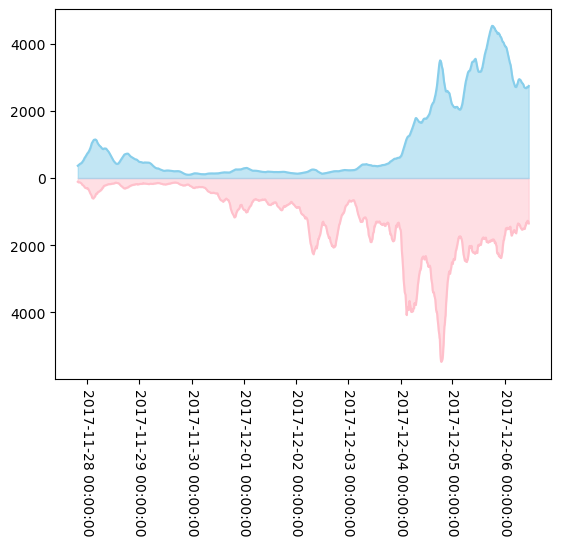

In [128]:
from matplotlib import pyplot as plt


fig,ax = plt.subplots()
ax.plot(df.index, df["Open"], label="Valor Open", color = "skyblue")
ax.plot(df.index, -df["Volume"], label="Volumen (en Millones)", color = "pink")
ax.set_xticklabels(df.index,rotation=-90)
plt.fill_between(df.index,-df['Volume'],alpha=0.5,color="pink")
plt.fill_between(df.index,df['Open'],alpha=0.5,color="skyblue")
ax.set_yticks([-4000, -2000, 0, 2000, 4000])
ax.set_yticklabels([4000, 2000, 0, 2000, 4000])
